<a href="https://colab.research.google.com/github/taskswithcode/probability_for_ml_notebooks/blob/main/MLToyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook has two parts.



*   The first part illustrates with an example that the numerical approximation of the gradient gets close to the true gradient or derivative of the function. This is done for a function of
  *   Function of a single variable  and
  *   Function of multiple variables

*   The second part is an updated version of the toy model we saw in a [previous notebook](https://colab.research.google.com/github/taskswithcode/probability_for_ml_notebooks/blob/main/MLToyModel_arith.ipynb), except in this version the gradient is calculated using the derivative.



**Part 1. Example to illustrate approximation of gradient gets close to the actual derivative of a function**



In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**Function of a single variable (imagine this to be a model with one dial)**

Lets calculate how this function responds for a small tweak of a dial using Calculus first

In [1]:
#some function of a single variable x
def f(x):
    return x**2 - 5*x + 3

In [2]:
#Derivative of f(x)  : 2x - 5.
def derivative_x(x):
    return 2*x - 5

In [3]:
val = derivative_x(4)
val

3

In [ ]:
f(4.0) #evaluation of function for x = 4

-1.0

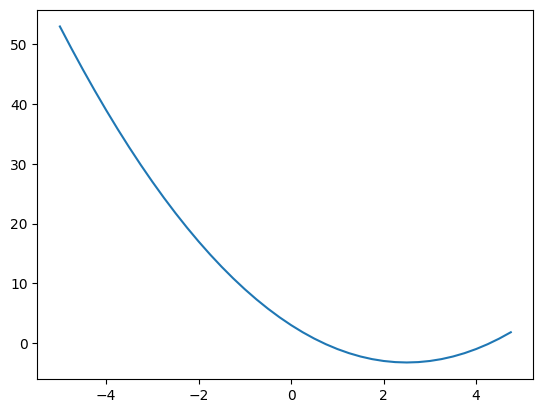

In [ ]:
x_values = np.arange(-5,5,.25)
y_values = f(x_values)
plt.plot(x_values,y_values) #visualizing the function

Now lets approximate it numerically by tweaking the value of the nudge h

In [5]:
h = .1 #change this value to see how the approximation of gradient approaches the true gradient value
x = 4
gradient = (f(x + h) - f(x))/h
print(gradient)
h = .01 #change this value to see how the approximation of gradient approaches the true gradient value
x = 4
gradient = (f(x + h) - f(x))/h
print(gradient)
h = .001 #change this value to see how the approximation of gradient approaches the true gradient value
x = 4
gradient = (f(x + h) - f(x))/h
print(gradient)
h = .0001 #change this value to see how the approximation of gradient approaches the true gradient value
x = 4
gradient = (f(x + h) - f(x))/h
print(gradient)
h = .00001 #change this value to see how the approximation of gradient approaches the true gradient value
x = 4
gradient = (f(x + h) - f(x))/h
print(gradient)
h = .000001 #change this value to see how the approximation of gradient approaches the true gradient value
x = 4
gradient = (f(x + h) - f(x))/h
print(gradient)

3.099999999999987
3.0100000000000904
3.0010000000011416
3.0001000000012823
3.000009999709618
3.0000009978436992


*Notice the approximation gets close to the true gradient or derivative of the function as h gets smaller*

**Function of multiple variables (imagine this to be a model with multiple dials)**

In [6]:
a = 2
b = -3
c = 10
f = a * b + c

#derivative of f w.r.t to a is b
#derivative of f w.r.t to b is a
#derivative of f w.r.t c is 1


In [8]:
#Lets find the gradient of the function w.r.t to a  by approximating it
h = .0001
v1 =  a * b + c
v2 = (a+h) * b + c
gradient = (v2 - v1)/h
print(gradient)




-3.000000000010772


*This is the same as the one we get through calculus - the value of b*

In [9]:
#Lets find the gradient of the function w.r.t to b  by approximating it
h = .0001
v1 =  a * b + c
v2 = a * (b+h) + c
gradient = (v2 - v1)/h
print(gradient)


2.0000000000042206


*This is the same as the one we get through calculus - the value of a*

In [10]:
#Lets find the gradient of the function w.r.t to c  by approximating it
h = .0001
v1 =  a * b + c
v2 = a * b + (c+h)
gradient = (v2 - v1)/h
print(gradient)

0.9999999999976694


This is the same as the one we get through calculus - the value of c

**Part 2. Machine Learning Toy Model**

This is the same toy model we saw earlier except we use the derivative of the loss function for the gradient as opposed to a numerical approximation of the gradient.

### Synthetic dataset creation


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data
np.random.seed(0)
rooms = 2 + np.random.normal(0, 1, 100)
prices = 100 + 50 * rooms + np.random.normal(0, 20, 100)

### 1. Line of best fit

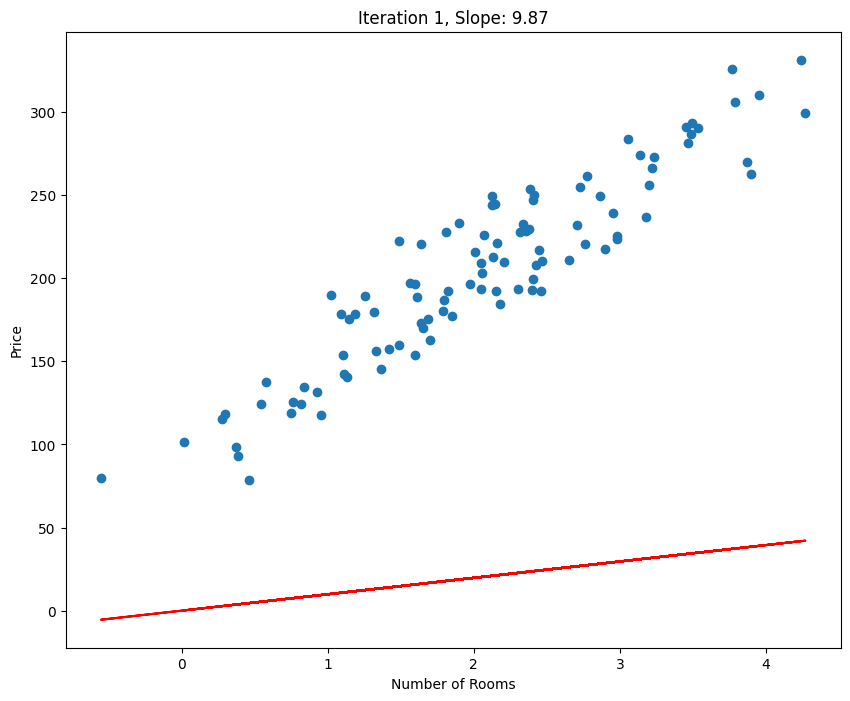

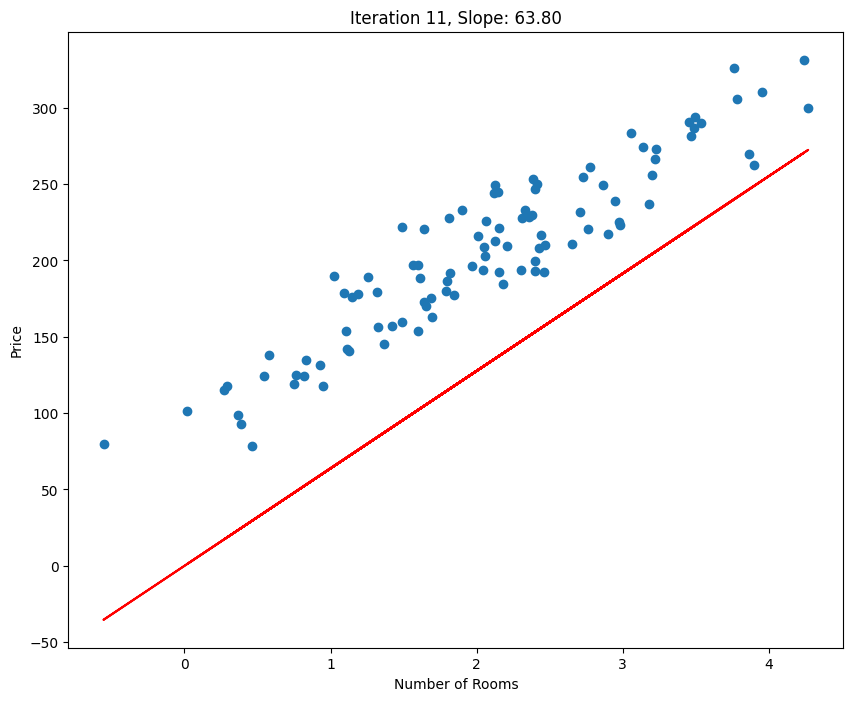

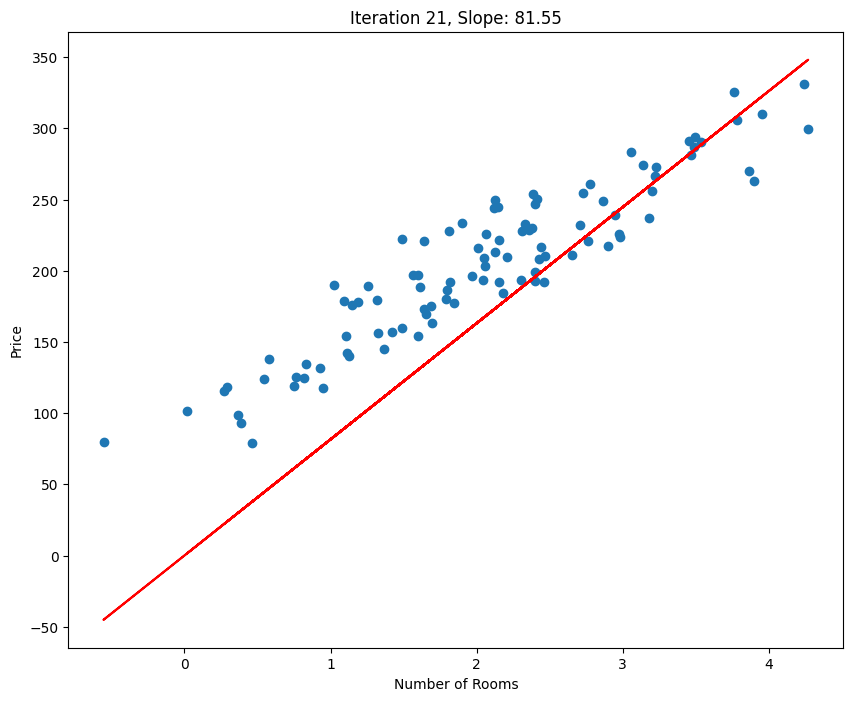

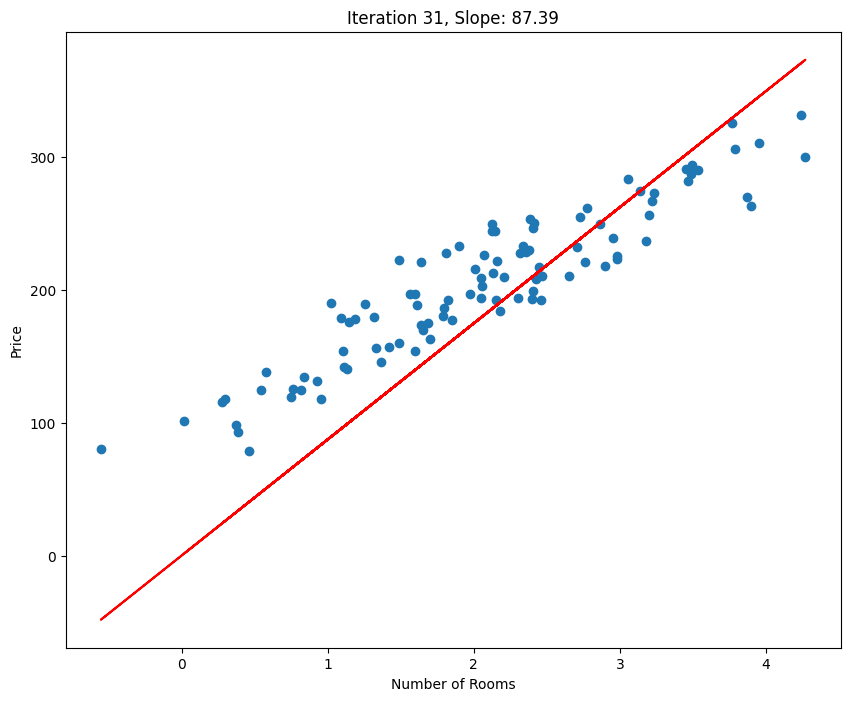

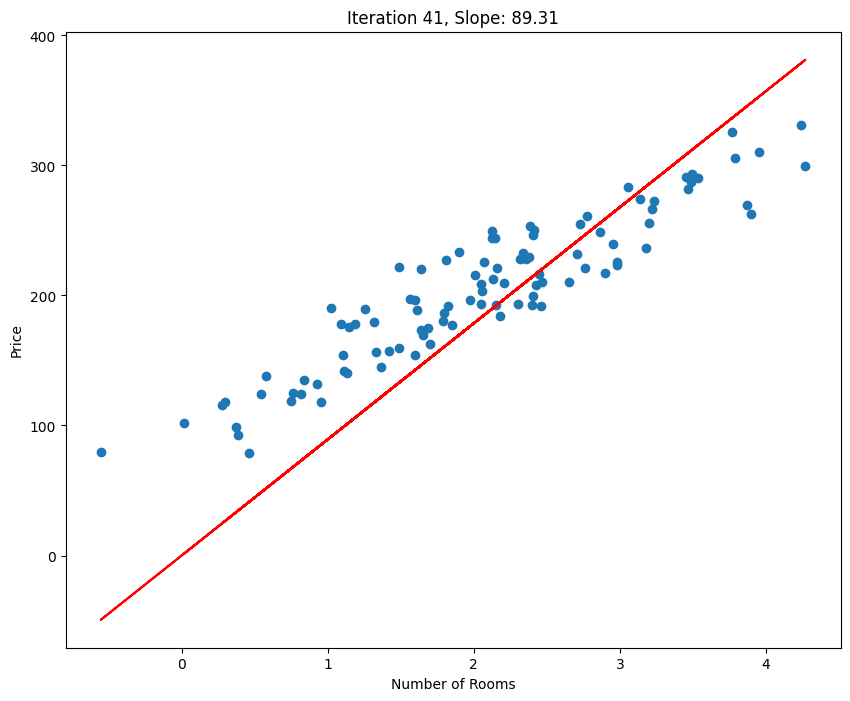

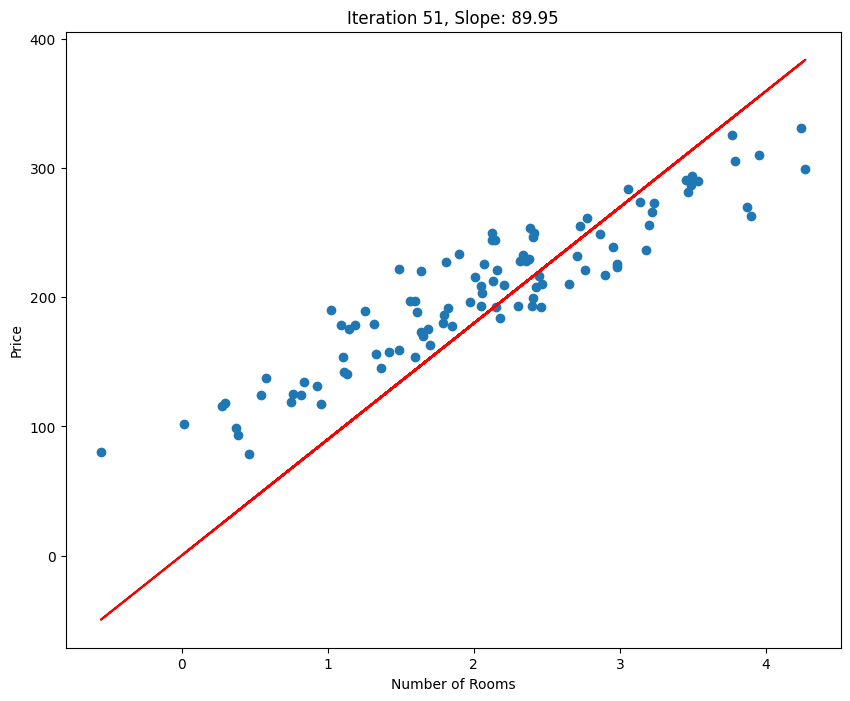

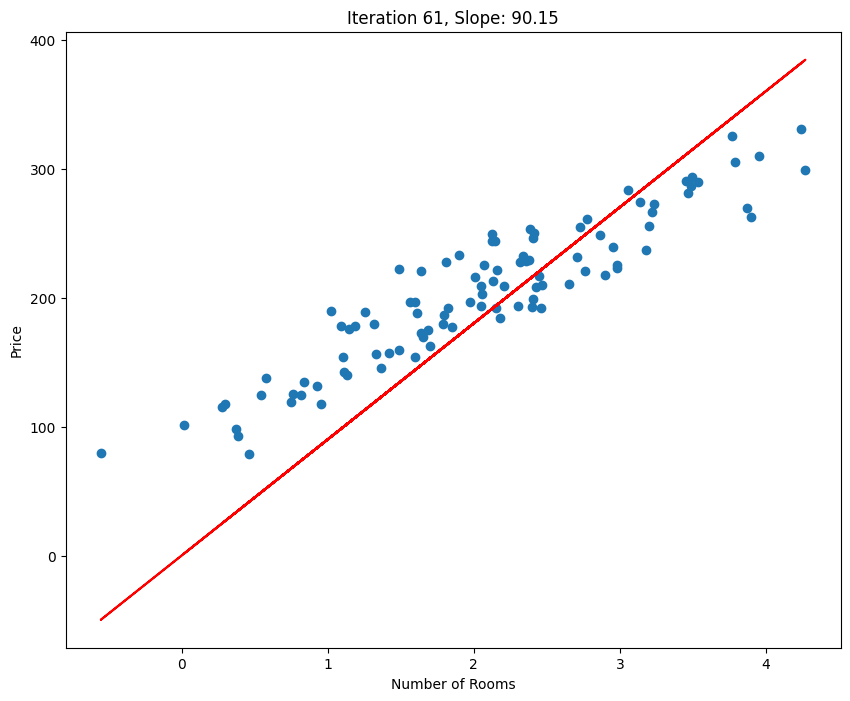

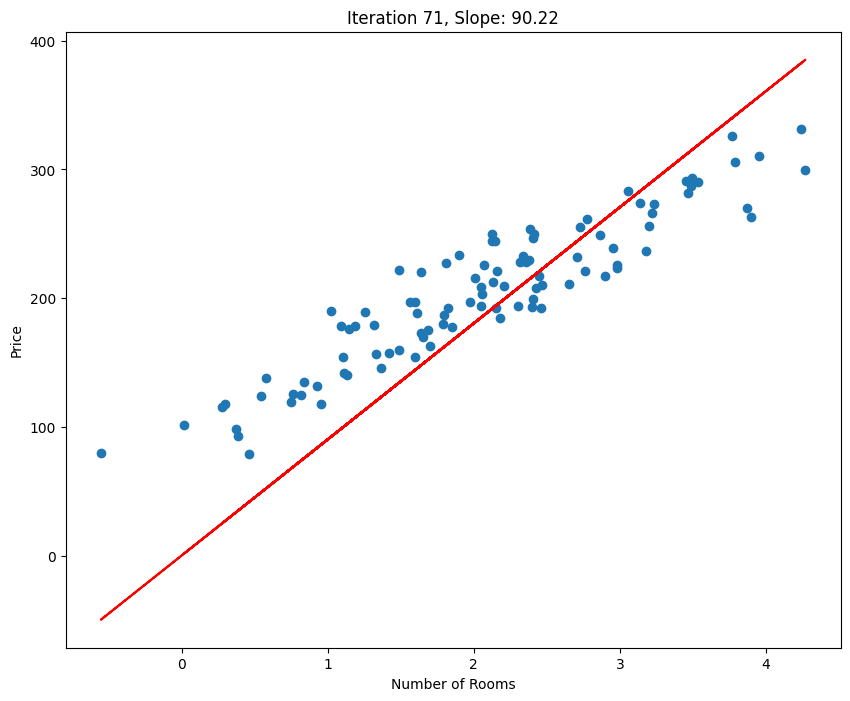

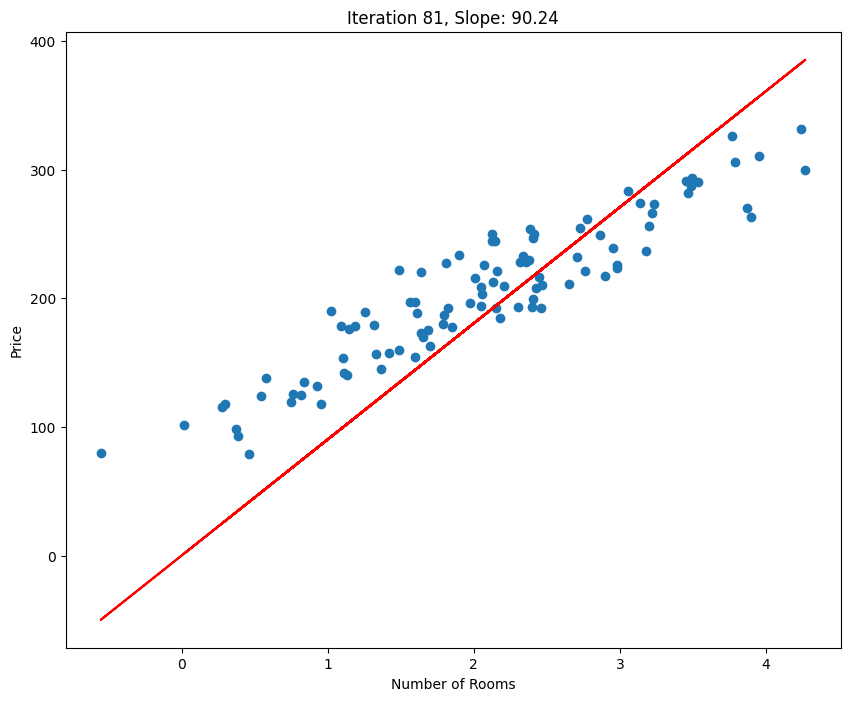

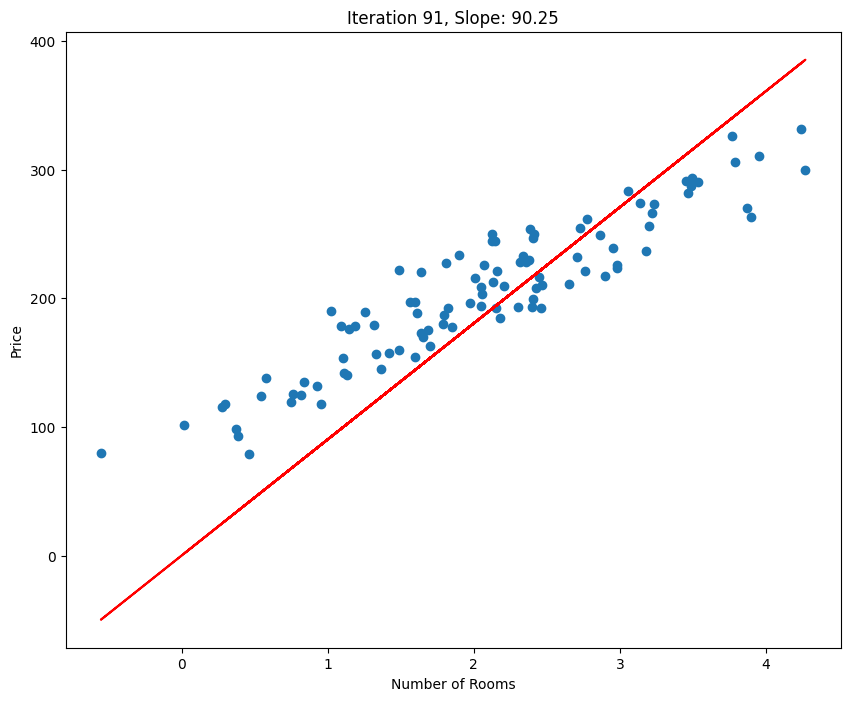

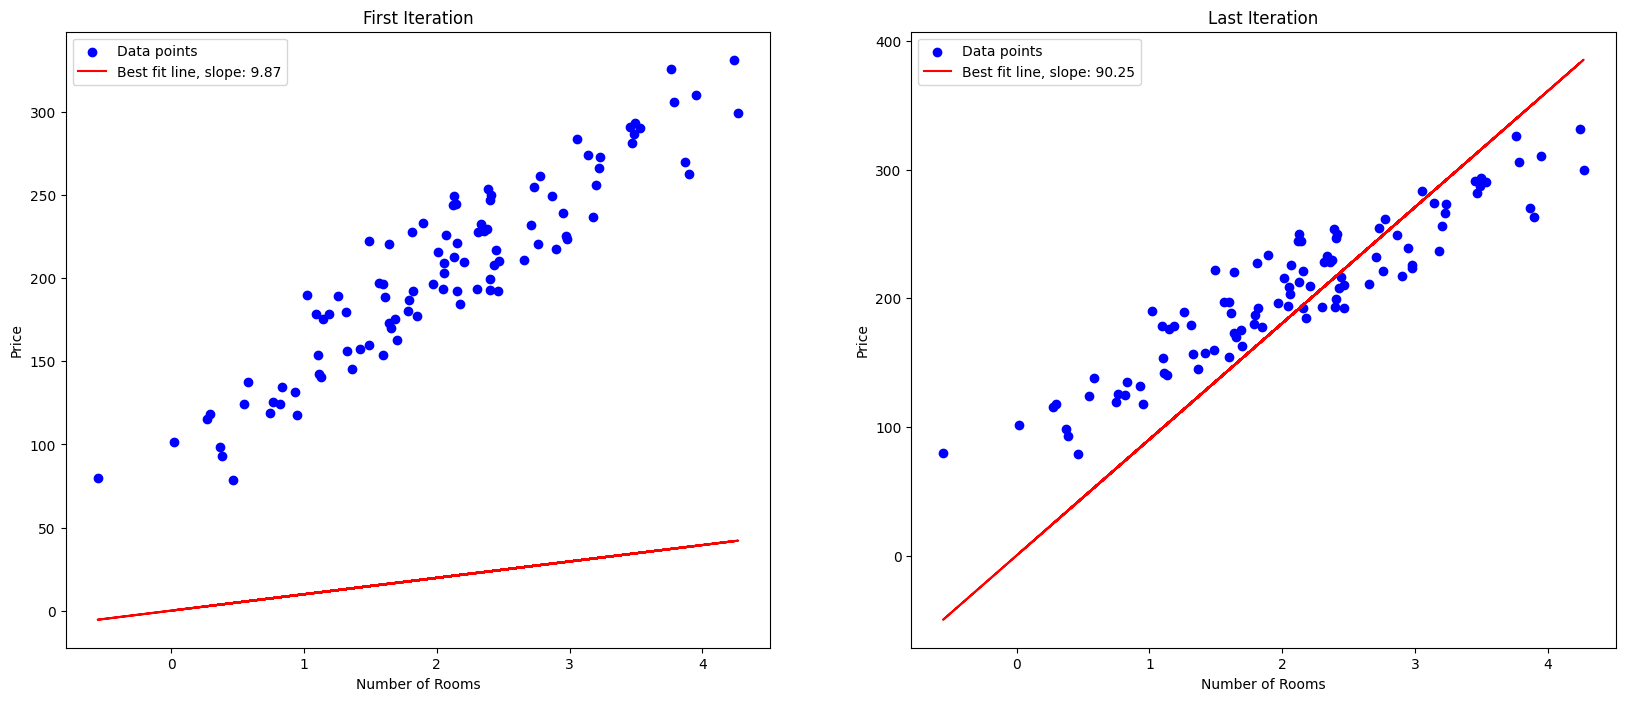

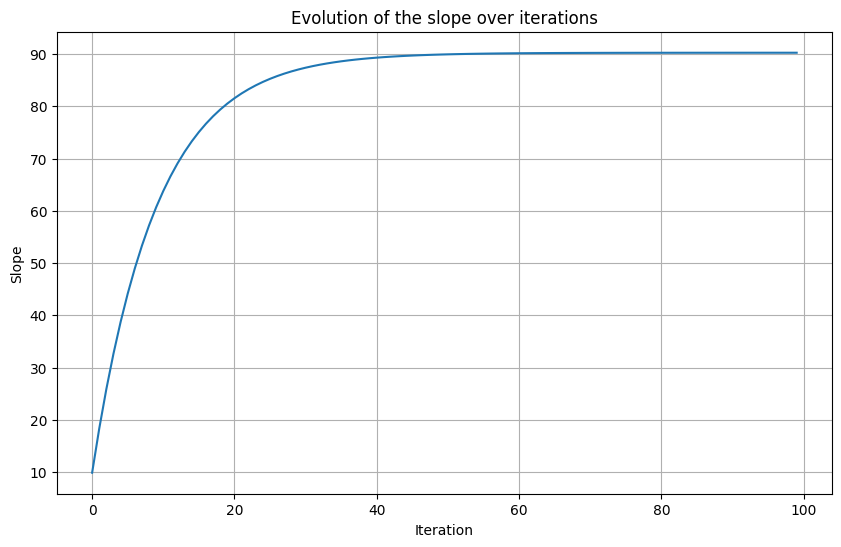

In [13]:
# Define function to predict prices
def predict_price(slope, rooms):
    return slope * rooms


# learning rate and number of iterations
lr = 0.01 #Tweak this to see how the model learning converges
iterations = 100

# initialize slope with a different random seed
np.random.seed(1)
slope = np.random.rand()

# training process
history_slope = []
for i in range(iterations):
    # predict prices
    pred_prices = slope * rooms

    # calculate error. Note we are not squaring because the gradient calcylation
    #using derivative only requires error. The loss function is indeed squared error
    error = pred_prices - prices

    # calculate gradient. This is the derivative of the squared loss
    gradient = np.mean(2 * rooms * error)

    # update slope
    slope -= lr * gradient

    # save history
    history_slope.append(slope)

    # visualization
    if (i % 10 == 0):
      plt.figure(figsize=(10, 8))
      plt.scatter(rooms, prices)
      pred_prices_vals = predict_price(slope, rooms)
      plt.plot(rooms, pred_prices_vals, color='red')
      plt.title(f'Iteration {i+1}, Slope: {slope:.2f}')
      plt.xlabel('Number of Rooms')
      plt.ylabel('Price')
      plt.show()

# Predict prices for the first and last iterations
first_slope = history_slope[0]
last_slope = history_slope[-1]

pred_prices_first_iter = predict_price(first_slope, rooms)
pred_prices_last_iter = predict_price(last_slope, rooms)

# Plot the data points and the lines of best fit
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# First iteration
ax[0].scatter(rooms, prices, color='blue', label='Data points')
ax[0].plot(rooms, pred_prices_first_iter, color='red', label=f'Best fit line, slope: {first_slope:.2f}')
ax[0].set_title('First Iteration')
ax[0].set_xlabel('Number of Rooms')
ax[0].set_ylabel('Price')
ax[0].legend()

# Last iteration
ax[1].scatter(rooms, prices, color='blue', label='Data points')
ax[1].plot(rooms, pred_prices_last_iter, color='red', label=f'Best fit line, slope: {last_slope:.2f}')
ax[1].set_title('Last Iteration')
ax[1].set_xlabel('Number of Rooms')
ax[1].set_ylabel('Price')
ax[1].legend()


plt.show()


# Plot the evolution of the slope over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_slope)
plt.title('Evolution of the slope over iterations')
plt.xlabel('Iteration')
plt.ylabel('Slope')
plt.grid(True)
plt.show()